In [1]:
# for Mathematical and Dataframe Operations
import numpy as np
import pandas as pd
# for Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_data .csv') #reading the csv file

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,2,1340,7912,2,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,3,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,3,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape

(4549, 18)

DATA ANALYSIS & CLEANING

In [5]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4549 non-null   object 
 1   price          4549 non-null   float64
 2   bedrooms       4549 non-null   int64  
 3   bathrooms      4549 non-null   int64  
 4   sqft_living    4549 non-null   int64  
 5   sqft_lot       4549 non-null   int64  
 6   floors         4549 non-null   int64  
 7   waterfront     4549 non-null   int64  
 8   view           4549 non-null   int64  
 9   condition      4549 non-null   int64  
 10  sqft_above     4549 non-null   int64  
 11  sqft_basement  4549 non-null   int64  
 12  yr_built       4549 non-null   int64  
 13  yr_renovated   4549 non-null   int64  
 14  street         4549 non-null   object 
 15  city           4549 non-null   object 
 16  statezip       4549 non-null   object 
 17  country        4549 non-null   object 
dtypes: float

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.549000e+03,4549.000000,4549.000000,4549.000000,4.549000e+03,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000
mean,5.576257e+05,3.396131,2.359420,2131.578809,1.483460e+04,1.564520,0.006595,0.234337,3.449549,1821.291932,310.286876,1970.787206,808.036272
std,5.638915e+05,0.901988,0.867845,955.234941,3.597114e+04,0.566647,0.080949,0.765085,0.675242,853.292493,462.043404,29.763891,979.313181
min,7.800000e+03,1.000000,1.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.261000e+05,3.000000,2.000000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.000000,1970.000000,7.680000e+03,2.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,3.000000,2610.000000,1.097000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,4.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
df['yr_built'].value_counts().sort_index(ascending=False)

2014    78
2013    55
2012    33
2011    24
2010    28
        ..
1904     9
1903    10
1902    10
1901     9
1900    22
Name: yr_built, Length: 115, dtype: int64

In [8]:
# converting yr_renovated to never,adults,middleage,old
def yr_built_cat(x):
    if x ==0:
        return 0
    elif x <= 1960 and x > 0:
        return 1
    elif x < 2000 and x > 1960:
        return 2
    else :
        return 3    

# lets apply this Function
df['yr_built_cat'] = df['yr_built'].apply(yr_built_cat)
df['yr_built_cat'].value_counts()

2    1932
1    1615
3    1002
Name: yr_built_cat, dtype: int64

In [9]:

# converting yr_renovated to never,adults,middleage,old
def yr_renovated_cat(x):
    if x ==0:
        return 0
    elif x <= 2000 and x > 0:
        return 1
    else :
        return 2   

# lets apply this Function
df['yr_renovated_cat'] = df['yr_renovated'].apply(yr_renovated_cat)
df['yr_renovated_cat'].value_counts()

0    2706
2     952
1     891
Name: yr_renovated_cat, dtype: int64

In [10]:
# checking the number of missing values
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
street              0
city                0
statezip            0
country             0
yr_built_cat        0
yr_renovated_cat    0
dtype: int64

In [11]:
# checking the duplicated rows
duplicate_rows = df[df.duplicated(keep=False)]
print("Duplicate Rows:")
print(duplicate_rows)
#df= df.drop_duplicates(keep='first',ignore_index=True )

Duplicate Rows:
Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country, yr_built_cat, yr_renovated_cat]
Index: []


In [12]:
low_prices= df[df['price']==0]
low_prices

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_built_cat,yr_renovated_cat


In [13]:
# cccc=(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#        'floors', 'waterfront', 'view', 'condition', 'sqft_above',
#        'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
#        'statezip', 'country'])
# for col in df.columns: #{'price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above'}
#     print(col)
#     print(df[col])
#     low_prices= df[df[col]==0]
#     low_prices.head(10)

In [14]:
# checking the distribution of categorical data
for col in df.columns:
    if df[col].dtype=='object' or df[col].dtype=='categorical' :
     print(col)
     print(df[col].value_counts())
     print("num of unique values: ",df[col].nunique())   
     print()   


date
23/06/2014 0:00    141
25/06/2014 0:00    130
26/06/2014 0:00    130
08/07/2014 0:00    126
09/07/2014 0:00    121
                  ... 
07/06/2014 0:00      4
06/07/2014 0:00      3
04/07/2014 0:00      2
11/05/2014 0:00      2
17/05/2014 0:00      1
Name: date, Length: 70, dtype: int64
num of unique values:  70

street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
14634 128th Ave NE       2
106 24th Ave E           2
4507 Linden Ave N        2
                        ..
34434 30th Ave SW        1
806 S 295th Pl           1
17904 Military Rd S      1
2525 276th Ct NE         1
18717 SE 258th St        1
Name: street, Length: 4474, dtype: int64
num of unique values:  4474

city
Seattle                1560
Renton                  291
Bellevue                281
Redmond                 234
Kirkland                187
Issaquah                186
Kent                    184
Auburn                  175
Sammamish               171
Federal Way             145
Shoreline          

In [15]:
df.corr()['price']

price               1.000000
bedrooms            0.212814
bathrooms           0.313074
sqft_living         0.445042
sqft_lot            0.051317
floors              0.154462
waterfront          0.150167
view                0.242407
condition           0.039238
sqft_above          0.380060
sqft_basement       0.218200
yr_built            0.021444
yr_renovated       -0.029661
yr_built_cat        0.038656
yr_renovated_cat   -0.027274
Name: price, dtype: float64

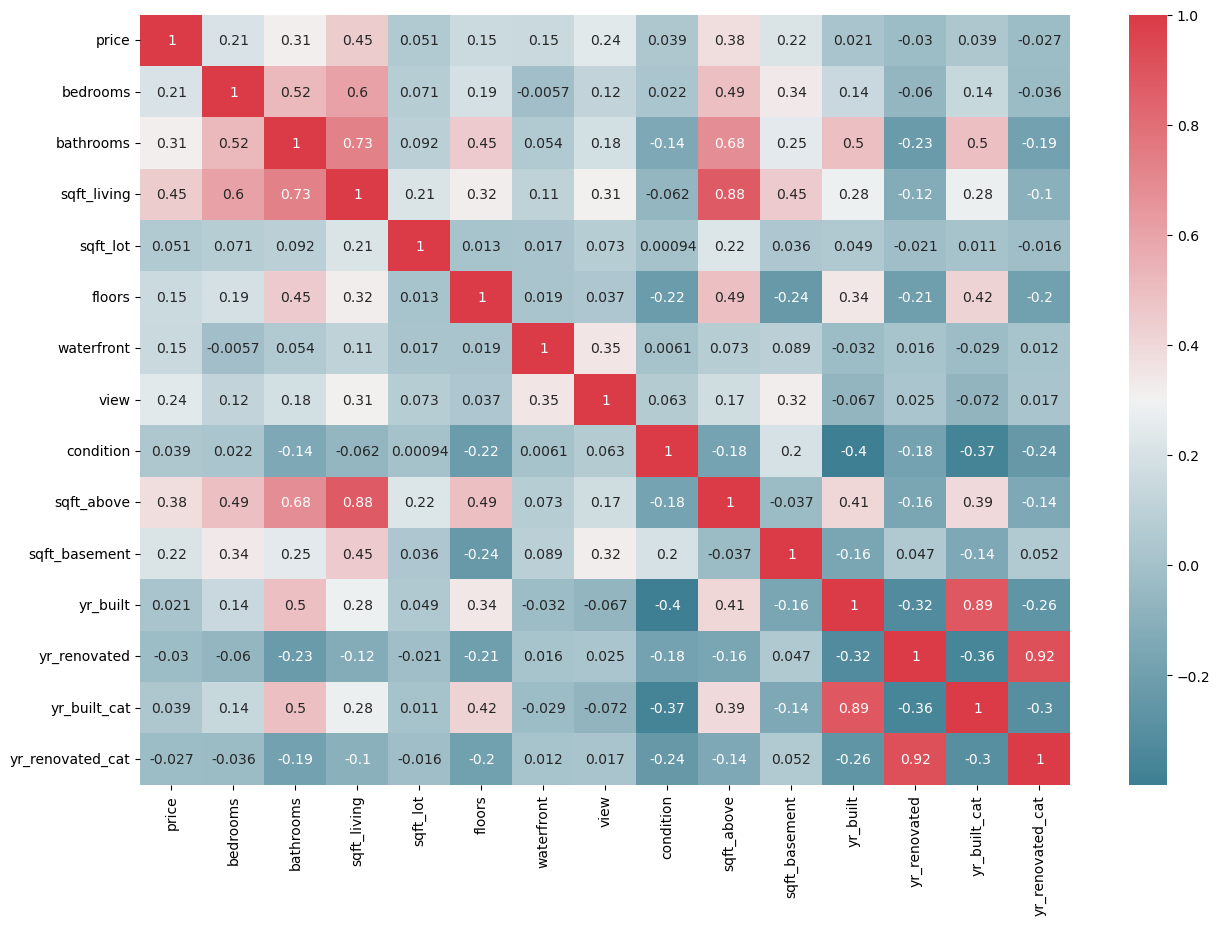

In [16]:
# sns.heatmap(df.corr(),annot=True)
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

In [17]:
df.columns.drop('price')

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'yr_built_cat', 'yr_renovated_cat'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from scipy import stats

def data_cleaning(df,target):
  # fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
  # index = 0
  # axs = axs.flatten()
  #  ROW - removing useless rows

  df=df[df.isnull().sum(axis=1)<=((len(df.columns))*80/100)]# remove rows that have more than 80% null values in
  df = df[~np.isnan(df[target])]#remove row if target column has no value
  df= df.drop_duplicates() # remove all duplicated rows
  
  # COL -
  for col in df.columns.drop(target):
    # 1) unique values in column
    if df[col].nunique()+df[col].isnull().sum()==df.shape[0] : #remove col if all values have unique num
        df.pop(col)
        print(col ," has unique values hence removed") 
        continue 

    # 2) constant values in column   
    elif df[col].value_counts().iloc[0] == df.shape[0]:
       df.pop(col)
       print(col ," has constant values hence removed") 
       continue 
    
    # 3) null values in column
    elif df[col].isnull().sum()>0: 
        print(col, df[col].dtypes," has ", df[col].isnull().sum(), " null values " , (df.shape[0]-df[col].isnull().sum())/100,"% \n")
        if df[col].isnull().sum()>0.8*df.shape[0]: 
          df.pop(col)   # remove col if col has more than 80% null values
          print(col," removed as had more than 80% null values\n")
          continue
        else:   # choose what to do with the col if col has less than 80% null values
          choice=int(input("do you want to \n 1) delete the column \n 2)fill it automatically? \n 3)fill it in with value given by you \n"))
          if choice ==1: 
            df.pop(col)
            continue
            print(col,"has been deleted\n")
          elif choice ==2:
            if df[col].dtypes=="float":
              df[col]=df[col].fillna(df[col].median()) ###group by class
              print(col," null values has been filled with ",df[col].median(),"\n")
            elif df[col].dtypes=="object" or df[col].dtypes=="int" :
              df[col]=df[col].fillna(df[col].mode()[0])    
              print(col," null values has been filled with ",df[col].mode()[0],"\n")
          elif choice ==3: 
            value=df[col].dtypes(input("enter any value of type ",df[col].dtypes),"\n" ) 
            df[col]=df[col].fillna(value)
          else: print("invalid choice") 

      #data transformation

    # 4) object col to int - 
    if df[col].dtypes=="object": #
          df[col]=le.fit_transform(df[col])#replaces old col object values with encode col
    # 5) deal with outliers or noise in continous col    
    elif df[col].dtypes=="float":
#         # sns.boxplot(df[col]) # to check outliers
#         # Interquartile range (IQR)
#         print("\n",col)
#         q1=df[col].quantile(0.25)
#         q3=df[col].quantile(0.75)
#         IQR=q3-q1
#         lower_outlier_range=(q1-1.5*IQR)
#         upper_outlier_range=(q1+1.5*IQR)
#         outliers = df[col][((df[col]<(lower_outlier_range)) | (df[col]>(upper_outlier_range)))]
#         print("outliers : ",len(outliers), " oulliers that means ",((len(outliers)/df.shape[0])/100)," % of rows are outiers" )
#         # print("total number of rows: ",df.shape[0])
#         # print("max outlier value: ",outliers.max())
#         # print("min outlier value: ",outliers.min())
#         outlier_choice=int(input("what would you do with the outliers \n1) remove \n2) capping"))
#         if outlier_choice==2:
#             df[col].values[df[col].values<lower_outlier_range]=lower_outlier_range
#             df[col].values[df[col].values>upper_outlier_range]=upper_outlier_range
#             print("outliers have been capped")
#         elif outlier_choice==1:
#             # get indexes for which column value is more than upper_outlier_range & less than lower_outlier_range
#             outliers_indexs = df[ (df[col] > upper_outlier_range) & (df[col] <lower_outlier_range)].index 
#             # drop these given row # indexes from dataFrame
#             df.drop(outliers_indexs, inplace = True) 
#             print("outliers have been removed 1",)
#             df=df[~(df[col]>upper_outlier_range & (df[col] <lower_outlier_range))]
#             print("outliers have been removed 2",)
#         # sns.boxplot(y=k, data=df, ax=axs[index])
#         # index += 1
#         print("skew :  ",df[col].skew())

    # 6) remove skewnes - continous column to normalized value           
        if df[col].skew()>1 or df[col].skew()<-1:
            print("Skewness in Column before Box cox transformation: " ,df[col].skew())
            # col_cox , lam = stats.boxcox(df[col])[0:2] #for non -ve
            df[col]=np.log1p(df[col])
            print("Skewness in Column afterBox cox transformation: " ,df[col].skew())#pd.Series(col_cox).skew()
            # df[col] = col_cox
        # sns.distplot(v, ax=axs[index])
            

    # 7) less corelated rows if column
    print("correlation of ",col,"column with the target variable")
    print(df[col].corr(df[target]))
    if abs(df[col].corr(df[target]))<0.1:
      print(col ," has less corelation with the target variable hence removed ", df[col].corr(df[target])) 
      df.pop(col)
      continue

  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
  return df

df= data_cleaning(df,'price')

correlation of  date column with the target variable
-0.023772519026023408
date  has less corelation with the target variable hence removed  -0.023772519026023408
correlation of  bedrooms column with the target variable
0.21281395398438166
correlation of  bathrooms column with the target variable
0.3130743291599928
correlation of  sqft_living column with the target variable
0.4450424721589076
correlation of  sqft_lot column with the target variable
0.05131660049526075
sqft_lot  has less corelation with the target variable hence removed  0.05131660049526075
correlation of  floors column with the target variable
0.15446213057094652
correlation of  waterfront column with the target variable
0.1501665268189029
correlation of  view column with the target variable
0.24240663955811936
correlation of  condition column with the target variable
0.03923765670399883
condition  has less corelation with the target variable hence removed  0.03923765670399883
correlation of  sqft_above column with the

<Figure size 640x480 with 0 Axes>

In [19]:
# df.pop('city')

In [20]:
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
3627,1200000.0,4,2,2120,2,0,0,2120,0
1825,272500.0,3,2,1410,1,0,0,1410,0
303,690000.0,3,2,1760,1,0,0,980,780
2404,485000.0,4,3,2470,2,0,0,2470,0
3500,1410000.0,4,2,3250,2,0,0,3250,0
2026,294700.0,3,2,1970,1,0,0,1300,670
1244,383000.0,3,1,1800,1,0,0,1200,600
1159,361000.0,3,1,1100,2,0,4,1100,0
459,212000.0,2,2,1020,2,0,0,1020,0
724,197500.0,3,1,980,2,0,0,980,0


In [21]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
0,313000.0,3,2,1340,2,0,0,1340,0
1,2384000.0,5,3,3650,2,0,4,3370,280
2,342000.0,3,2,1930,1,0,0,1930,0
3,420000.0,3,2,2000,1,0,0,1000,1000
4,550000.0,4,3,1940,1,0,0,1140,800


<AxesSubplot:>

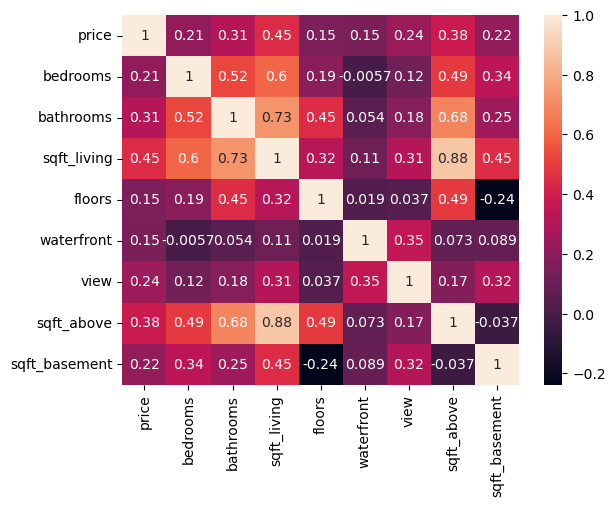

In [22]:
sns.heatmap(df.corr(),annot=True)

DATA PREPROCESSING

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mmsc=MinMaxScaler()
def data_x_y_spliting(df,target):
 # spliting x,y
    x=df.drop([target], axis=1)
    x_col_names = x.columns
    y=df[target]
#     .to_frame() 

 #standarization of x   
    x= mmsc.fit_transform(x) # we dont want to tranform the y values
#     x = pd.DataFrame(x, columns=x_col_names)
    print("regression")
    return x,y

x ,y=  data_x_y_spliting(df,'price')

regression


In [24]:
x.shape[1]

8

In [25]:
x

array([[0.25      , 0.14285714, 0.07365224, ..., 0.        , 0.10730088,
        0.        ],
       [0.5       , 0.28571429, 0.24905087, ..., 1.        , 0.33185841,
        0.05809129],
       [0.25      , 0.14285714, 0.11845103, ..., 0.        , 0.17256637,
        0.        ],
       ...,
       [0.25      , 0.28571429, 0.20045558, ..., 0.        , 0.2920354 ,
        0.        ],
       [0.375     , 0.14285714, 0.13059985, ..., 0.        , 0.07743363,
        0.21161826],
       [0.25      , 0.28571429, 0.08504176, ..., 0.        , 0.12389381,
        0.        ]])

In [26]:
y.shape

(4549,)

In [27]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4544    3.081667e+05
4545    5.343333e+05
4546    4.169042e+05
4547    2.034000e+05
4548    2.206000e+05
Name: price, Length: 4549, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0 ) #20% will be test 
# random state=0 to get same values for train &test every time we run it
print('Shape of X_train is ', X_train.shape)
print('Shape of X_test is ', X_test.shape)
print('Shape of Y_train is ', Y_train.shape)
print('Shape of Y_test is ', Y_test.shape)

Shape of X_train is  (3639, 8)
Shape of X_test is  (910, 8)
Shape of Y_train is  (3639,)
Shape of Y_test is  (910,)


MODEL TRAINING AND EVALUATION

In [29]:
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0 ) #20% will be test 
# m1=LinearRegression().fit(X_train, Y_train)
# ypred= m1.predict(X_test)
# print(m1)
# print("act")
# print(Y_test)
# print("pred")
# print(ypred)
# actual_vs_predicted(Y_test,ypred)
# print(np.sqrt(mean_squared_error(Y_test,ypred)))

In [30]:
# importing the models
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.naive_bayes import GaussianNB #for non -ve values only
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingRegressor 
from xgboost.sklearn import XGBRegressor 
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
def create_regression_models():
    models = {
        "LR":LinearRegression(),
        "Ridge":Ridge(),
        "Lasso":Lasso(),
        "GBR":GradientBoostingRegressor(),
        "XGB":XGBRegressor(),
        "BR":BayesianRidge(),
#         "GNB":GaussianNB(),
#         "MNB":MultinomialNB(), 
        "SVR":SVR(),
        "DTR":DecisionTreeRegressor(random_state = 0), 
        "RFR":RandomForestRegressor(random_state=0), 
        "KNR":KNeighborsRegressor()
    }
    return models
from sklearn.metrics import mean_squared_error, make_scorer,r2_score
mse_scorer=make_scorer(mean_squared_error) 
r2_scorer=make_scorer(r2_score) 
# metrics.r2_score(Y_test, test_data_prediction)

In [31]:
# def compare_models(x,y):
    
#   X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0 ) #20% will be test 
#   models_dictionary=create_regression_models()
#   model_name_list=[]  
#   accuracy_scores_list=[]
#   result=[]  
#   for model_name, model in models_dictionary.items():
        
#         m1=model.fit(X_train, Y_train)
#         ypred= m1.predict(X_test)
# #         rmse_train= mean_squared_error (Y_train,m1.predict(X_train), squared=False)# better than mse as RMSE penalizes the model more effectively than “MAE” when it makes bad predictions and has the same unit of the target.
# #         rmse_test= mean_squared_error (Y_test,ypred, squared=False)# better than mse as RMSE penalizes the model more effectively than “MAE” when it makes bad predictions and has the same unit of the target.
        
#         rmse_train = np.sqrt(mean_squared_error(Y_train,m1.predict(X_train)))
#         rmse_test= np.sqrt(mean_squared_error(Y_test,ypred))
        
#         s1=m1.score(X_test,Y_test)
#         s2=m1.score(X_train,Y_train)
#         print("Model",m1)
#         regression_models_evaluation(Y_test,ypred)
#         print("score: ",s1)# r^2 score = error score
#         result.append({
#         'Name': model_name,    
#         'Model used' : model,
#         'Testing rmse' : rmse_test,
#         'Training rmse' :rmse_train  
#         })
#         model_name_list.append(model_name)
#         accuracy_scores_list.append(s1)
#         actual_vs_predicted(Y_test,ypred)
#         print()
#         print('---------------------------------------------------------------')
#         print()
# #   accuracy_scores_lst=[dict["accuracy score"] for dict in result ]
# #   print(accuracy_scores_lst)
# #   plotting_accuracy_score_Comparation(model_name_list ,accuracy_scores_list)
#   result_dataframe = pd.DataFrame(result, columns = ['Name','Model used','Testing rmse','Training rmse'])
#   best_model_index = result_dataframe['Testing rmse'].idxmin()
#   best_model_name = result_dataframe.loc[best_model_index, 'Name']
#   best_model = result_dataframe.loc[best_model_index, 'Model used']
#   print("Best Model:", best_model)
#   print("""because of:
# a) Testing rmse  {}
# b) Training rmse  {}""".format(result_dataframe.loc[best_model_index, 'Testing rmse'],result_dataframe.loc[best_model_index, 'Training rmse'] ))
#   print("we can see that {} has the best training and testing accuracy also their differnece is not much".format(best_model))
# # print("Model with highest prediction score for test dataset is:\n",result_dataframe[result_dataframe['Testing Accuracy score']==result_dataframe['Testing Accuracy score'].max()])
#   print(result_dataframe)
#   return best_model_name,best_model
        
# def regression_models_evaluation (ytest,ypred):
#   from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
#   mae= mean_absolute_error (ytest,ypred)# mean or average of all the errors
#   mse= mean_squared_error (ytest,ypred) #better tahn mse as focus is more on large error due to square term and penelizes teh model for erors better but unit is also squared
#   rmse= mean_squared_error (ytest,ypred, squared=False)# better than mse as RMSE penalizes the model more effectively than “MAE” when it makes bad predictions and has the same unit of the target.
#   #rae= #mean values of target and takes total absolute error and normalizes it
#   r2 = r2_score(ytest,ypred) #defines how much variation in the response does the model explain
#   print("MSE = ",mse)
#   print("MAE = ",mae)
#   print("RMSE = ",rmse)
#   print("R^2 = ",r2)

# def plotting_accuracy_score_Comparation(models_names,accuracy_scores): 
#     sns.set()
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(models_names,accuracy_scores,color=['#102963','#5a2be2','#9966cc','#df73ff','#702763','#502763','#4023','#E6E6FA'],label=accuracy_scores);
#     for i in ax.patches:
#         ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
#     plt.title('Comparison of Different Classification Models');
#     plt.ylabel('Accuracy');
#     plt.xlabel('Regression Models');
#     plt.show();
#     print()
    
# def actual_vs_predicted(ytest,ypred):
#     plt.scatter(ytest,ypred)
#     plt.xlabel("Actual Price")
#     plt.ylabel("Predicted Price")
#     plt.title(" Actual Prices vs Predicted Prices")
#     plt.show()

In [32]:
# name,model=compare_models(x,y)

In [33]:

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold,cross_val_score
#We then loop over these models, performing 5-fold cross-validation using cross_val_score and calculating the mean RMSE scores. 
#The negative mean squared error (neg_mean_squared_error) is used as the scoring metric.
# After evaluating all models, the model with the lowest mean RMSE score is selected as the best model based on the assumption that lower RMSE and higher R2 indicates better performance . 
#The best model is stored in the variable best_model.
def compare_models_cross_validation(X,y):
    regression_models = create_regression_models()
    evaluation_metrics = []
    k_fold = KFold(n_splits=5, shuffle=True,random_state=0)  
    for name,model in regression_models.items():
        rmse_scores = (-cross_val_score(model, X, y, cv=k_fold, scoring='neg_mean_squared_error'))**0.5
        mean_rmse = rmse_scores.mean()

        mae_scores = cross_val_score(model, X, y, cv=k_fold, scoring='neg_mean_absolute_error')
        mean_mae = (-mae_scores).mean()

        r2_scores = cross_val_score(model, X, y, cv=k_fold, scoring='r2') #
        mean_r2 = r2_scores.mean()

        evaluation_metrics.append({
            'Name':name,
            'Model': model,#type(model).__name__,
            'RMSE': mean_rmse,
            'MAE': mean_mae,
            'R-squared': mean_r2
        })

    df_evaluation = pd.DataFrame(evaluation_metrics)
#     print(df_evaluation)

    # Find the best model based on the lowest RMSE score
    best_model_index = df_evaluation['RMSE'].idxmin()
    best_model_name=df_evaluation.loc[best_model_index, 'Name']
    best_model = df_evaluation.loc[best_model_index, 'Model']
    print("Best Model:", best_model)
#     print("i ",best_model_index)
    print("""because of:
a) highest R^2 score of {}
b) lowest root mean squared error {}""".format(df_evaluation.loc[best_model_index, 'R-squared'],df_evaluation.loc[best_model_index, 'RMSE'] ))
    print (df_evaluation)
    return best_model_name,best_model


In [34]:
best_model_name,best_model=compare_models_cross_validation(x,y)

Best Model: Ridge()
because of:
a) highest R^2 score of 0.3777989350377651
b) lowest root mean squared error 422838.91674971784
    Name                                              Model           RMSE  \
0     LR                                 LinearRegression()  422902.161945   
1  Ridge                                            Ridge()  422838.916750   
2  Lasso                                            Lasso()  422902.269066   
3    GBR                        GradientBoostingRegressor()  441867.303500   
4    XGB  XGBRegressor(base_score=None, booster=None, ca...  513420.782222   
5     BR                                    BayesianRidge()  501839.079236   
6    SVR                                              SVR()  518688.131110   
7    DTR              DecisionTreeRegressor(random_state=0)  551005.915457   
8    RFR              RandomForestRegressor(random_state=0)  513061.244143   
9    KNR                              KNeighborsRegressor()  471211.375550   

             

In [35]:
print(best_model_name)

Ridge


In [36]:
print(best_model)

Ridge()


The choice between MSE and RMSE depends on the specific context and preference. MSE is often preferred when the errors need to be further analyzed or compared in their original scale. On the other hand, RMSE is preferred when a more easily interpretable metric is desired, as it is in the same unit as the target variable.

GRID SEARCH 

In [37]:

# from sklearn.metrics import make_scorer, mean_squared_error, r2_score,mean_absolute_error
# from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
# def create_model_hyperparameters():
#     model_hyperparameters = {
    

#     'Ridge': {
#         'solver' : ['svd', 'cholesky', 'lsqr', 'sag'],
#         'alpha' : [1,10,50,100],
#         'fit_intercept':[True, False]
# #         'normalize':[True, False]
#     },
    
#     'Lasso': {
# #         'solver' : ['svd', 'cholesky', 'lsqr', 'sag'],
#         'alpha' : [1,10,50,100],#[0.0001, 0.001,0.01, 0.1, 1, 10]
#         'fit_intercept':[True, False]
# #         'normalize':[True, False]
#     },

#     'SVR': {
#         'kernel' : ['linear','poly','rbf','sigmoid'],
#         'gamma': [0.01,0.1,1,10],
#         'C' : [1,5,10,20]
#     },


#     'KNR' : {
#         'n_neighbors' : [3,5,7,10,12],#, Number of neighbor points to consider for prediction
#         'weights': ['uniform', 'distance'],  # weight function used in prediction
#         'p': [1,2]   # p=1 compute manhattan distance, p=2 compute euclidean distance
#     },
        
#     'DTR' : {
#         'max_depth': [7], #np.linspace(1, 10, 10) The maximum depth of the tree
#         'max_features': ['auto', 'sqrt'], #The number of features to consider when looking for the best split
#         'min_samples_leaf': [3,4,5,6,7,8], #[3,4,5,6,7,8] The minimum number of samples required to be at a leaf node
#         'min_samples_split': [0.1], #np.linspace(0.1, 1.0, 10) The minimum number of samples required to split an internal node
#         'criterion': ['absolute_error', 'friedman_mse', 'poisson', 'squared_error'] #The function to measure the quality of a split    
#     },

#     'RFR' : {
#         'n_estimators' : [10, 20, 50, 100], #number of trees in the forest
#         'max_depth': [4,5,6,7,8,9],# maximumm length from beginning of the tree to the trees end nodes                
#         'max_features': ['auto', 'sqrt'], 
#         'min_samples_leaf': [2,3,4,5,6,7],          
#         'min_samples_split' : [0.01]     
#     },
#     'GBR' : {
#         'learning_rate': [0.01,0.02,0.03,0.04],
#         'subsample'    : [0.9, 0.5, 0.2, 0.1],
#         'n_estimators' : [100,500,1000, 1500],
#         'max_depth'    : [4,6,8,10]    
#     },
#     'XGB': {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }
        
#     }
#     return model_hyperparameters


# def compare_models_gridSearch1(X,y,best_model_name):
# # Define the models and parameter grids in a dictionary
# #     model_params = {
# #         LinearRegression(): {'normalize': [True, False]},
# #         DecisionTreeRegressor(): {'max_depth': [None, 5, 10]},
# #         RandomForestRegressor(): {'n_estimators': [100, 200, 500]}
# #     }
#     models_dictionary = create_regression_models() 
#     hyperparameters_dictionary =create_model_hyperparameters()
    
#     # Define the evaluation metrics
#     scoring = {
#         'RMSE': make_scorer(mean_squared_error, squared=False),
#         'R-squared': make_scorer(r2_score)
#     }
    
#     # Perform GridSearchCV for each model
#     best_models = []
#     best_hyperparameters = []
#     best_scores=[]
#     best_results=[]
#     for model_name in hyperparameters_dictionary.keys():
#         if model_name== best_model_name:
#             model= models_dictionary[model_name]  
#             params = hyperparameters_dictionary[model_name]
#             grid_search = GridSearchCV(model, params, scoring=scoring, cv=5, refit='RMSE')
#             grid_search.fit(X, y)
#             best_models.append(grid_search.best_estimator_)
#             best_hyperparameters.append(grid_search.best_params_)
#             best_scores.append(grid_search.best_score_)
#             best_results.append(grid_search.cv_results_)
#             print('index ',model)
#             print("Best Model:", model)
#             print("Best Hyperparameters:", grid_search.best_params_)
#             print("score",grid_search.best_score_)
#             print("result: ",grid_search.cv_results_)
#         else:
#             continue
        

#     # Create a DataFrame to store the results
#     evaluation_metrics = []

#     for model, hyperparameters, score, result in zip(best_models, best_hyperparameters,best_scores,best_results):
#         y_pred = model.predict(X)
#         rmse = mean_squared_error(y, y_pred, squared=False)
#         mae = mean_absolute_error(y, y_pred)
#         r2 = r2_score(y, y_pred)
#         evaluation_metrics.append({
#             'Model': type(model).__name__,
#             'Best Hyperparameters': hyperparameters,
#             'RMSE': rmse,
#             'MAE': mae,
#             'R-squared': r2,
#             'Best Score': score,
#             'Best Result': result
#         })
      
#     df_evaluation = pd.DataFrame(evaluation_metrics)
#     print(df_evaluation)

#    # Find the best model based on the highest R-squared score and lowest RMSE
# #     best_model_index = df_evaluation['R-squared'].idxmax()
# #     best_model = df_evaluation.loc[best_model_index, 'Model']
# #     best_hyperparams = df_evaluation.loc[best_model_index, 'Best Hyperparameters']
# #     best_scores = df_evaluation.loc[best_model_index, 'Best Score']
# #     best_results = df_evaluation.loc[best_model_index, 'Best Result']
# #     print('index ',best_model_index)
# #     print("Best Model:", best_model)
# #     print("Best Hyperparameters:", best_hyperparams)

    
    
#     return df_evaluation


In [38]:

from sklearn.metrics import make_scorer, mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
def create_model_hyperparameters():
    model_hyperparameters = {
    
     'LR':{
        
    'fit_intercept': [True, False],  # Whether to calculate the intercept
    
    'copy_X': [True, False]          # Whether to copy the input variables before fitting
     }
        ,
    'Ridge': {
        'solver' : ['svd', 'cholesky', 'lsqr', 'sag'],
        'alpha' : [1,10,50,100],
        'fit_intercept':[True, False]
#         'normalize':[True, False]
    },
    
    'Lasso': {
#         'solver' : ['svd', 'cholesky', 'lsqr', 'sag'],
        'alpha' : [1,10,50,100],#[0.0001, 0.001,0.01, 0.1, 1, 10]
        'fit_intercept':[True, False]
#         'normalize':[True, False]
    },

    'SVR': {
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'gamma': [0.01,0.1,1,10],
        'C' : [1,5,10,20]
    },


    'KNR' : {
        'n_neighbors' : [3,5,7,10,12],#, Number of neighbor points to consider for prediction
        'weights': ['uniform', 'distance'],  # weight function used in prediction
        'p': [1,2]   # p=1 compute manhattan distance, p=2 compute euclidean distance
    },
        
    'DTR' : {
        'max_depth': [7], #np.linspace(1, 10, 10) The maximum depth of the tree
        'max_features': ['auto', 'sqrt'], #The number of features to consider when looking for the best split
        'min_samples_leaf': [3,4,5,6,7,8], #[3,4,5,6,7,8] The minimum number of samples required to be at a leaf node
        'min_samples_split': [0.1], #np.linspace(0.1, 1.0, 10) The minimum number of samples required to split an internal node
        'criterion': ['absolute_error', 'friedman_mse', 'poisson', 'squared_error'] #The function to measure the quality of a split    
    },

    'RFR' : {
        'n_estimators' : [10, 20, 50, 100], #number of trees in the forest
        'max_depth': [4,5,6,7,8,9],# maximumm length from beginning of the tree to the trees end nodes                
        'max_features': ['auto', 'sqrt'], 
        'min_samples_leaf': [2,3,4,5,6,7],          
        'min_samples_split' : [0.01]     
    },
    'GBR' : {
        'learning_rate': [0.01,0.02,0.03,0.04],
        'subsample'    : [0.9, 0.5, 0.2, 0.1],
        'n_estimators' : [100,500,1000, 1500],
        'max_depth'    : [4,6,8,10]    
    },
    'XGB': {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
        
    }
    return model_hyperparameters


def compare_models_gridSearch1(X,y,best_model_name):
# Define the models and parameter grids in a dictionary
#     model_params = {
#         LinearRegression(): {'normalize': [True, False]},
#         DecisionTreeRegressor(): {'max_depth': [None, 5, 10]},
#         RandomForestRegressor(): {'n_estimators': [100, 200, 500]}
#     }
    models_dictionary = create_regression_models() 
    hyperparameters_dictionary =create_model_hyperparameters()

    # Define the evaluation metrics
    scoring = {
        'RMSE': make_scorer(mean_squared_error, squared=False),
        'R-squared': make_scorer(r2_score)
    }
    
    # Perform GridSearchCV for each model
    best_models = []
    best_hyperparameters = []
    best_scores=[]
    best_results=[]
#     for model_name in hyperparameters_dictionary.keys():
#         print("ML = ",model_name)
#         if model_name==best_model_name:
    model= models_dictionary[best_model_name]  
    params = hyperparameters_dictionary[best_model_name]
    print("model")
    grid_search = GridSearchCV(model, params, scoring=scoring, cv=5, refit='RMSE')
    grid_search.fit(X, y)
    print("gs")
    print(grid_search)
    best_models.append(grid_search.best_estimator_)
    best_hyperparameters.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)
    best_results.append(grid_search.cv_results_)


    # Create a DataFrame to store the results
    evaluation_metrics = []

    for model, hyperparameters, score, result in zip(best_models, best_hyperparameters,best_scores,best_results):
        y_pred = model.predict(X)
        rmse = mean_squared_error(y, y_pred, squared=False)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        evaluation_metrics.append({
            'Model': type(model).__name__,
            'Best Hyperparameters': hyperparameters,
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'Best Score': score,
            'Best Result': result
        })

    df_evaluation = pd.DataFrame(evaluation_metrics)
#     print(df_evaluation)

    # Find the best model based on the highest R-squared score and lowest RMSE
    best_model_index = df_evaluation['R-squared'].idxmax()
    best_model = df_evaluation.loc[best_model_index, 'Model']
    best_hyperparams = df_evaluation.loc[best_model_index, 'Best Hyperparameters']
    best_scores = df_evaluation.loc[best_model_index, 'Best Score']
    best_results = df_evaluation.loc[best_model_index, 'Best Result']
    print('index ',best_model_index)
    print("Best Model:", best_model)
    print("Best Hyperparameters:", best_hyperparams)
    
    return df_evaluation,grid_search


In [39]:
gs_df, best_model=compare_models_gridSearch1(x,y,best_model_name)
gs_df

model
gs
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 10, 50, 100],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sag']},
             refit='RMSE',
             scoring={'R-squared': make_scorer(r2_score),
                      'RMSE': make_scorer(mean_squared_error, squared=False)})
index  0
Best Model: Ridge
Best Hyperparameters: {'alpha': 100, 'fit_intercept': True, 'solver': 'lsqr'}


,Model,Best Hyperparameters,RMSE,MAE,R-squared,Best Score,Best Result
0,Ridge,"{'alpha': 100, 'fit_intercept': True, 'solver'...",515258.042506,188710.433927,0.16487,429797.771355,"{'mean_fit_time': [0.0028546810150146484, 0.00..."


In [40]:
print(best_model)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 10, 50, 100],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sag']},
             refit='RMSE',
             scoring={'R-squared': make_scorer(r2_score),
                      'RMSE': make_scorer(mean_squared_error, squared=False)})


In [41]:
best_model.predict(X_test)

array([ 551418.91698791,  344473.1890274 ,  524259.5871162 ,
        469449.82831186,  546933.64024707,  860254.21080468,
        655135.05012041,  531472.96632359,  617013.83723935,
        554803.86826458,  426355.5942156 ,  455585.79724257,
        359838.7450831 ,  479760.75945789,  575179.61787711,
        636037.8590226 ,  581998.61931762,  567496.70981017,
        578472.10699282,  458541.65823811,  473600.36184558,
        428934.58678347,  679939.44775319,  362765.51766514,
        495489.92745465,  319026.27391122, 1241999.24548609,
       1131498.57525372,  334391.82996693,  641159.71104117,
        714404.33125717,  522131.73478856,  443251.76367122,
        429843.28058655,  430081.28705204,  648991.57443444,
        668888.38908172,  756027.10050629,  553772.58080478,
        753965.96489138,  416843.58332397,  404716.94198412,
        586001.45730629,  649449.39403651,  971906.95186075,
        604566.04061364,  733803.34280431,  440249.32960036,
        536793.97744517,

In [42]:
X_test

array([[0.125     , 0.28571429, 0.07820805, ..., 0.        , 0.11393805,
        0.        ],
       [0.25      , 0.        , 0.03264996, ..., 0.        , 0.04756637,
        0.        ],
       [0.25      , 0.14285714, 0.07668945, ..., 0.        , 0.11172566,
        0.        ],
       ...,
       [0.25      , 0.28571429, 0.08428246, ..., 0.        , 0.08960177,
        0.06224066],
       [0.375     , 0.28571429, 0.19514047, ..., 0.        , 0.28429204,
        0.        ],
       [0.375     , 0.14285714, 0.11693242, ..., 0.        , 0.17035398,
        0.        ]])

In [43]:
Y_test

1504    474800.0
1445    370000.0
2702    350000.0
3159    160797.0
3391    328423.0
          ...   
2553    667000.0
871     280000.0
843     341000.0
2705    752000.0
380     835000.0
Name: price, Length: 910, dtype: float64

In [44]:
import pickle  
pickle.dump(best_model,open('model.pkl','wb'))

In [45]:
pickle.dump(mmsc,open('scaler.pkl','wb'))

In [46]:
result = best_model.predict(mmsc.fit_transform(np.array([3,4,1350,2,0,3,1350,0]).reshape(1,x.shape[1])))
#price	bedrooms	bathrooms	sqft_living	floors	waterfront	view	sqft_above	sqft_basement

In [47]:
result

array([276750.41644832])

In [48]:
result1 = best_model.predict((np.array([3,2,1340,2,0,0,1340,0]).reshape(1,x.shape[1])))
result1

array([1.04426601e+09])